In [1]:
from __future__ import division
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import math
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import time
from scipy import spatial

In [2]:
#df = pd.read_csv('formatted_data_updated.csv')
df = pd.read_csv('formatted_data_ing.csv')
df = df.replace('?', np.nan)
#print df
newdf = df.drop('UserID', axis = 1)
newdf

,cayenne pepper garlic powder thyme pork chops salt and pepper,non-fat greek yogurt agave nectar almond milk chia seeds cocoa powder oatmeal strawberries,cream of tartar egg whites ice cream lb cake powdered sugar,almond extract almond extract cherry pie filling cream cheese devil's food cake mix powdered sugar sugar water whipping cream,baking powder baking soda bananas brown sugar butter chocolate chips cinnamon creamy peanut butter egg flour granulated sugar salt vanilla,banana coconut flakes coconut meat coconut oil graham cracker crumbs ice cubes lemon juice light coconut milk vanilla extract,almond meal baking powder baking soda Spice Rub carrots coconut coconut oil eggs fruit ground flaxseed lemon zest salt tofu vanilla extract walnut pieces whey protein powder,cream cheese eggs ham,brown sugar chicken wings cilantro garlic powder ground ginger honey lime low sodium chicken broth olive oil onion powder salt and pepper sriracha,canned tomatoes cheese tortellini chicken stock cube fresh parsley fresh thyme garlic cloves half and half olive oil parmesan cheese Salt & Pepper shrimp,...,butter celery chicken broth fresh parsley onion pepper pork chops salt white bread,brown sugar butter cinnamon flour oatmeal pears,bacon flour fresh thyme half n half low sodium chicken broth onion russet potatoes Salt & Pepper scallion sharp cheddar cheese sour cream,chicken breasts cream of chicken soup cream of mushroom soup colby jack onion rice salsa shredded cheddar cheese,butter chicken breasts garlic herb spreadable cheese garlic powder milk paprika,allspice baking powder brown sugar butter cinnamon cocoa powder egg flour oats salt vanilla,coconut flour dark chocolate maple syrup smooth peanut butter vanilla,almond butter almond flour baking powder baking soda blueberries cherries eggs lemon juice lemon zest sea salt sugar unbleached flour vanilla yogurt,basil leaves braggs liquid aminos broccoli florets canola oil carrot chili chilies garlic japanese eggplant peppercorns shirataki noodles soy sauce bbq sauce stevia tamari tofu vinegar water zucchini,caster sugar cream cheese egg whites egg yolks lemon juice milk plain flour silken tofu vanilla extract
0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
training_set = newdf[0:31]

test_set = newdf[31:37]


Adding all of the ratings corresponding to each recipe in a list of lists to make computation easier.

In [4]:
def makeArrays(dataframe): 
    recipeRatings = []
    #print recipeRatings
    for col in dataframe:
        lists = []
        for val in dataframe[col]:
            lists.append(val) 
        recipeRatings.append(lists)
    #print recipeRatings
    return recipeRatings

def averages(array):
    i = 0
    for ratings in array:
        sums = 0
        count = 1
        for rating in ratings:

            if(not math.isnan(rating)):
                sums  = sums + rating
                count = count +1
            average = float(sums/count)
            #print average
            array[i] = [average if math.isnan(x) else float(x) for x in array[i]]
        i = i+1

    #returns a numpy array
    return np.array(array)

In [5]:
#compute the averages of the row
def averages(row):
    #instantiate our variables
    avg = float(0)
    counter = float(1)

    #iterate over the cols in the row
    for col in row:
        if not np.isnan(float(col)):
            avg += float(col)
            counter += 1
    #compute the average
    return (avg/counter)


In [6]:
#initlize list of lists for spectral
training_data = []

for index, row in newdf.iterrows():
    #preprocessing for every row
    avg = averages(row)
    #initlize rows
    rows = []
    #for each col in row
    for col in row:
        #cast to float for nan behavior
        col = float(col)
        #if missing data
        if np.isnan(col):
            rows.append(avg)
        #not missing data
        else:
            rows.append(col)

    training_data.append(rows)

#cast to np array for fun times
training_data = np.array(training_data)


# K-means

#run PCA to reduce the data dimensionality so that it is easier to visualize
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(training_data)

In [7]:
#training_data = averages(makeArrays(training_set.T))
#print training_set.shape
kmeans = KMeans(n_clusters=6, random_state=0).fit(training_data)

[3 0 2 0 0 0 1 0 1 2 5 3 2 0 5 2 5 5 0 0 2 0 4 5 5 0 2 2 0 5 5 0 0 0 2 1 2
 5]


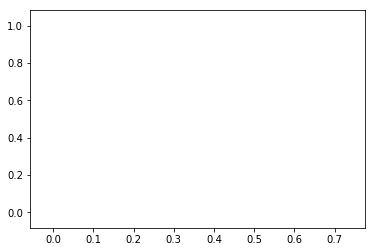

In [8]:
labels_kmeans = kmeans.labels_
set_lk = set(labels_kmeans)
print labels_kmeans
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.show()

test_data = averages(makeArrays(test_set.T))
kmeans.predict(test_data)
kmeans.score(test_data)


# Spectral clustering

In [9]:
spectral = SpectralClustering()
spectral.fit(training_data)
print "lables from clustering"
spectral_labels =  spectral.labels_
set_ls = set(spectral_labels)

lables from clustering


# Hierarchial/Agglomerative Clustering

In [10]:
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(training_data, n_neighbors=10, include_self=False)

In [11]:
ward = AgglomerativeClustering(n_clusters=8, connectivity=connectivity,
                               linkage='ward').fit(training_data)

In [12]:
h_labels = ward.labels_
print h_labels
set_lh = set(h_labels)

[3 2 1 1 2 2 7 2 7 6 0 3 1 2 0 6 0 0 1 2 1 2 4 0 0 2 6 6 5 0 0 2 2 1 1 7 1
 0]


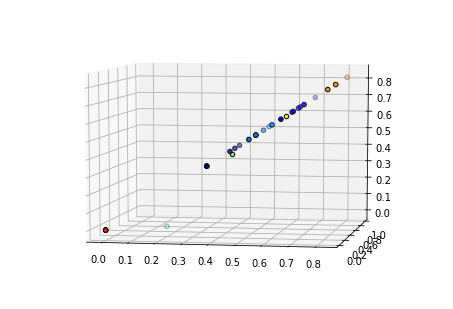

In [13]:
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(h_labels):
    ax.scatter(training_data[h_labels == l, 0], training_data[h_labels == l, 1], training_data[h_labels == l, 2],
               color=plt.cm.jet(float(l) / np.max(h_labels + 1)),
               s=20, edgecolor='k')

plt.show()

In [14]:
#testing
#
def getLabelsDict(set_labels, label_vals):
    labels_dict = {}
    ind = 0

    for i in range(0, len(set_labels)):
        labels_dict[i] = []
    #print len(set_lk)
    #print labels_dict
    for i in label_vals:
        #if i not in labels_dict.values:
        #print i
        labels_dict[i].append(ind)
        ind = ind + 1

    return labels_dict
    

In [28]:
colNames =  list(newdf.columns.values)
#print colNames
def findEle(index):
    #get all the colums corresponding to the particular row
    #colVals = df.loc[[index]]
    toRet = []
    likes = []
    dislikes = []
    counter = int(0)
    for col in colNames:
        if not np.isnan(float(newdf.loc[[index]][col])):
            #print np.array(newdf.loc[[index]][col].astype(list))[1]
            for i in np.array(newdf.loc[[index]][col].astype(list)):
                #print type(i)
                if i == "1":
                    likes.append(counter)
                else:
                    dislikes.append(counter)
        counter += 1
            #toRet.append(col)
    #print "likes: ", likes
    #print "dislikes: ", dislikes
    return (likes, dislikes)
    

TF-IDF

In [29]:
#compute tf-idf for the given array
#in Scikit-Learn
def tfIDF(colNames):
    
    names_to_vec = {}
    sklearn_tfidf = TfidfVectorizer(stop_words = 'english')
    vec_representation = sklearn_tfidf.fit(colNames)
    feature_names = sklearn_tfidf.get_feature_names()
    #print vec_representation
    idx = 0
    for names in feature_names:
        
        names_to_vec[names] = (sklearn_tfidf.idf_[idx], idx)
        idx = idx +1
    
    zerosLists = [[0] * len(feature_names)] * len(colNames)
    
    i = 0
    for rec in colNames:
       
        for word in rec.strip().split(' '):
            if word in names_to_vec:
                zerosLists[i][names_to_vec[word][1]] = names_to_vec[word][0]
                
        i = i + 1
     
    #print zerosLists
    return zerosLists

print len(tfIDF(colNames))

376


recipeDict = {}

for rec in colNames:
    #rec = set(rec)
    for word in rec.strip().split(' '):
        
        if (recipeDict.has_key(word)):
            recipeDict[word] += 1
        else:
            recipeDict[word] = 1

def tfIDF():
    total = len(colNames)
    tf = [{}] * len(colNames)
    #zerosOnEveryRecipe = [[]] * total
    count = 0
    for rec in colNames:
        #print rec
        tf[count] = {}

        #zerosOnEveryRecipe[count].append(0)
        # get term frequency
        for word in rec.strip().split(' '):
            
            if (tf[count].has_key(word)):
                tf[count][word] += 1
            else:
                tf[count][word] = 1

        # scale term frequency by idf
        for word in tf[count]:
            tf[count][word] = float(tf[count][word]*total/recipeDict[word])
        count += 1
        print tf
        return tf
   
tfIDF()

Cosine similarity

In [32]:
def cosine_computations(getLabelsDict, set_lk, label):
    userdata = {}
    tfidf_vecs = tfIDF(colNames)
    for i in range(0, len(set_lk)):
        userdata[i] = {}
        for j in range(0, len(label)):
            userdata[i][j] = {}
            for k in range(0, len(label)):
                userdata[i][j][k] = ([],[])

    user_ignored = int(0)

    #1-------
    #         for like in likes:
    #             eachuserlike = []
    #             if not len(likes) == 0:
    #                 eachuserlike = like
    #             userdata.append(eachuserlike)


    #for each cluster
        #for each user in the cluster
            #get the liked recipes
            #get the disliked recipes
            #for each user not /= original 
                #get the liked recipes
                #get the disliked recipes
                #compare the recipes


    #for each cluster

    for key in labels_dict:
        print "key: " , key   
        #print "Key: ", key
        #for each user in the cluster
        for user1 in labels_dict[key]:
            likes1, dislikes1  = findEle(user1)
            #print "User1: ", user1
            #-----------1
            #go through every other user
            if not len(likes1) == 0 and not len(dislikes1) == 0:
                for user2 in labels_dict[key]:
                    #print "User2", user2
                    #get the likes and dislikes
                    likes2, dislikes2 = findEle(user2)

                    if not len(likes2) == 0 and not len(dislikes2) == 0:
                        
                        #comparison of recipes
                        #for each recipe in first user's 
                        for like1 in likes1:
#                             #for each recipe in second user's
                             for like2 in likes2:
                                #get the liked similarity and place in array
                                #cluster -> user1 -> user2 -> tuple of likes/dislikes -> liked comparison
                                #print "like1: ", np.array(like1), " like2: ", np.array(like2)
                                #userdata[key][user1][user2][0].append(cosine_similarity(like1, like2)) #likes
                                userdata[key][user1][user2][0].append(spatial.distance.cosine(tfidf_vecs[like1], tfidf_vecs[like2]))

                        for dislike1 in dislikes1:
#                           #for each recipe in second user's
                             for dislike2 in dislikes2:
#                                 #get the liked similarity and place in array
#                                 #cluster -> user1 -> user2 -> tuple of likes/dislikes -> disliked comparison
#                                 userdata[key][user1][user2][1].append(cosine_similarity(dislike1, dislike2)) #likes
                                userdata[key][user1][user2][1].append(spatial.distance.cosine(tfidf_vecs[dislike1], tfidf_vecs[dislike2])) #likes

                    else:
                        user_ignored += 1
                    
                    #print "likes: ", userdata[key][user1][user2][0]
                    #print "dislikes: ", userdata[key][user1][user2][0]
            else:
                user_ignored += 1
            
            #print user_ignored
   
        
    return userdata
        
                    #tfIDF(likes)

                    #print likes
            #print likes


            #print likes
            #print dislikes

In [33]:
def average_list_nan(data):
    average = float(0)
    counter = float(1)
    for el in data:
        if not np.isnan(float(el)):
            average += float(el)
            counter += 1
    return average/counter

In [34]:
def average_sim_cluster(userdata):
    averages = []#[() for _ in range(len(userdata))]
    for cluster in userdata:
        averagelikes = float(0)
        averagedislikes = float(0)
        counter = float(1)
        
        for user1 in userdata[cluster]:
            for user2 in userdata[cluster]:
                averagelikes += average_list_nan(userdata[cluster][user1][user2][0])
                averagedislikes += average_list_nan(userdata[cluster][user1][user2][1])
                counter += 1
        averages.append((averagelikes/counter, averagedislikes/counter))
    return averages
        #return (averagelikes/counter, averagedislikes/counter)

For k-means

In [ ]:
#get the labels dictionary
labels_dict = getLabelsDict(set_lk, labels_kmeans)
#pass into cosine similarity computations
userdata = cosine_computations(labels_dict, set_lk, labels_kmeans)
# print userdata
print average_sim_cluster(userdata)

key:  0


In [ ]:
#get the labels dictionary
labels_dict = getLabelsDict(set_ls, spectral_labels)
#pass into cosine similarity computations
userdata = cosine_computations(labels_dict, set_ls,spectral_labels )
# print userdata
print average_sim_cluster(userdata)

In [ ]:
#get the labels dictionary
labels_dict = getLabelsDict(set_lh, h_labels)
#pass into cosine similarity computations
userdata = cosine_computations(labels_dict, set_lh, h_labels)
# print userdata
print average_sim_cluster(userdata)